## Actividad
Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, encontrando los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [ ]:
import numpy as np
import sympy as sp
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from numpy.linalg import solve

In [ ]:
#Matriz
A = np.array([
	[1, 0, 0, 0, 0, 1, 0, 0],
	[0, 1, 0, 1, 0, 0, 1, 0],
	[0, 0, 1, 0, 1, 0, 0, 1],
	[1, -1, 0, 0, 0, 3, 0, 0],
  [0, 1, -1, 0, 2, 0, 3, 0],
  [0, 0, 0, 1, 0, 0, 0, 3],
  [0, 0, 0, -1, 0, 3, 0, 0],
  [0, 0, 0, 1, -1, 0, 3, 0]])
b = np.array([-2, 0, 1, 0, 0, 0, 0, 0])

x_points = np.array([-1, 0, 1, 2])
y_points = np.array([5, 3, 3, 4])

sol = solve(A,b)

b0, b1, b2, c1, c2, d0, d1, d2 = sol
a0 = 5
a1 = 3
a2 = 3
c0 = 0

x = sp.symbols('x')
x0, x1,x2 = -1, 0, 1

In [ ]:
S0 = a0 + b0*(x+x0) + c0*(x+x0)**2 + d0*(x+x0)**3
S0

-2.42*x + 0.42*(x - 1)**3 + 7.42

In [ ]:
S1 = a1 + b1*(x-x1) + c1*(x-x1)**2 + d1*(x-x1)**3
S1

-0.1*x**3 + 1.26*x**2 - 1.16*x + 3

In [ ]:
S2 = a2 + b2*(x-x2) + c2*(x-x2)**2 + d2*(x-x2)**3
S2

0.46*x - 0.42*(x - 1)**3 + 0.96*(x - 1)**2 + 2.54

In [ ]:
#Las convartimos en funciones
S0_ = sp.lambdify(x, S0)
S1_ = sp.lambdify(x, S1)
S2_ = sp.lambdify(x, S2)

S2_(1.5)

3.4175

In [ ]:
#Comprobamos
cs = CubicSpline(x_points, y_points, bc_type='natural')
cs(1.5)

array(3.45)

Procedimiento a mano

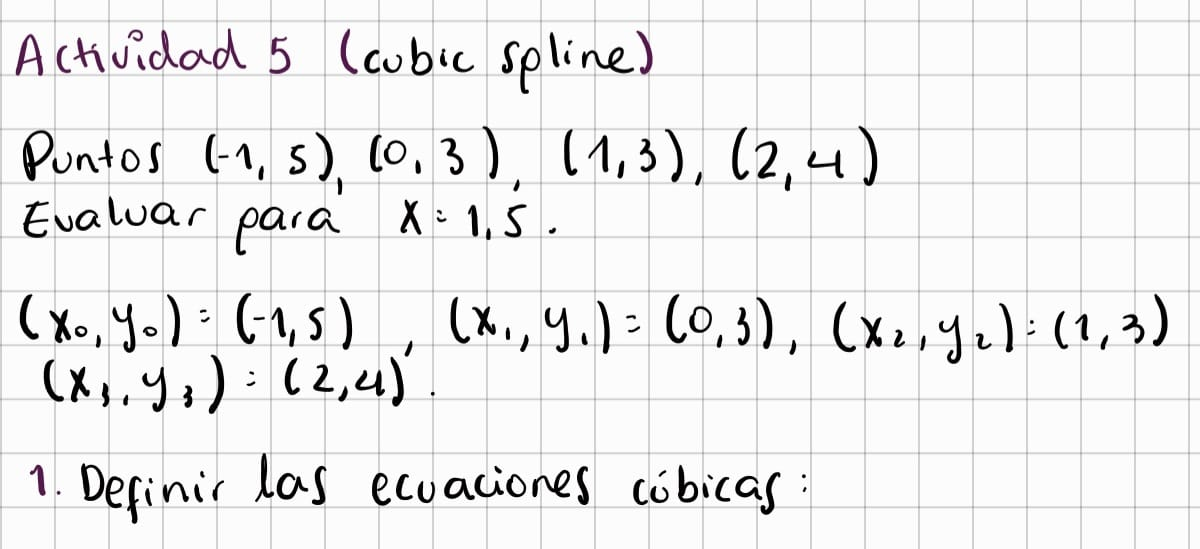

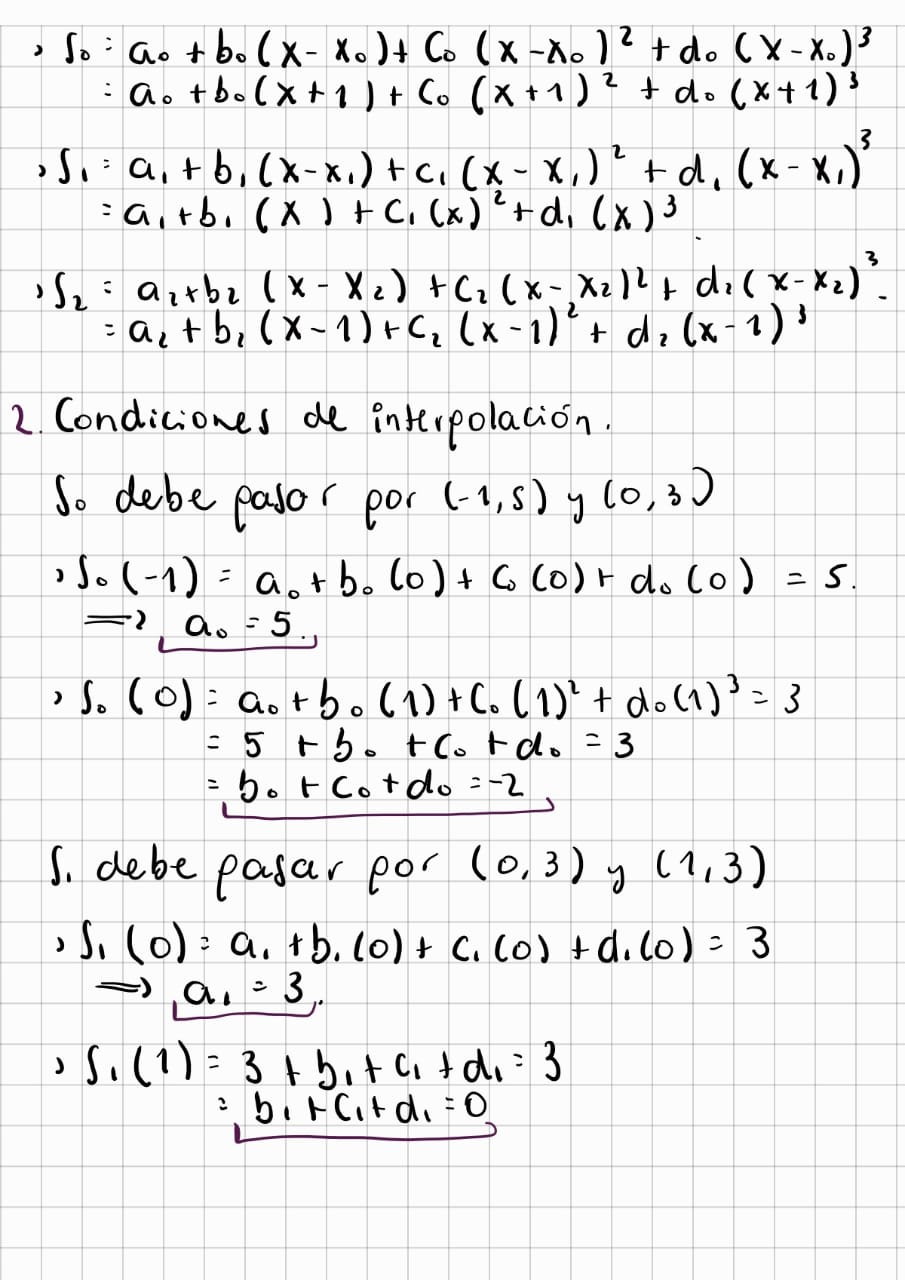

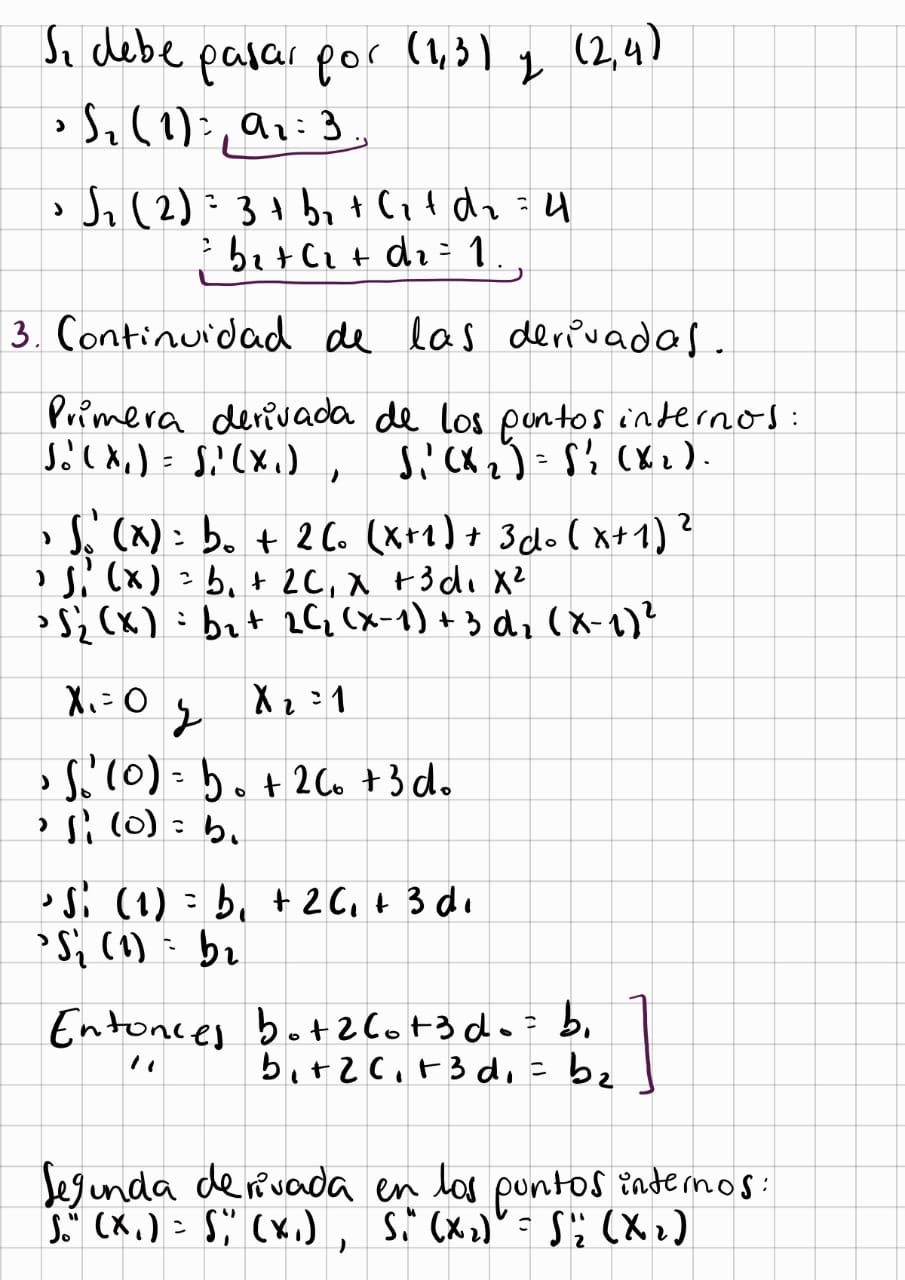

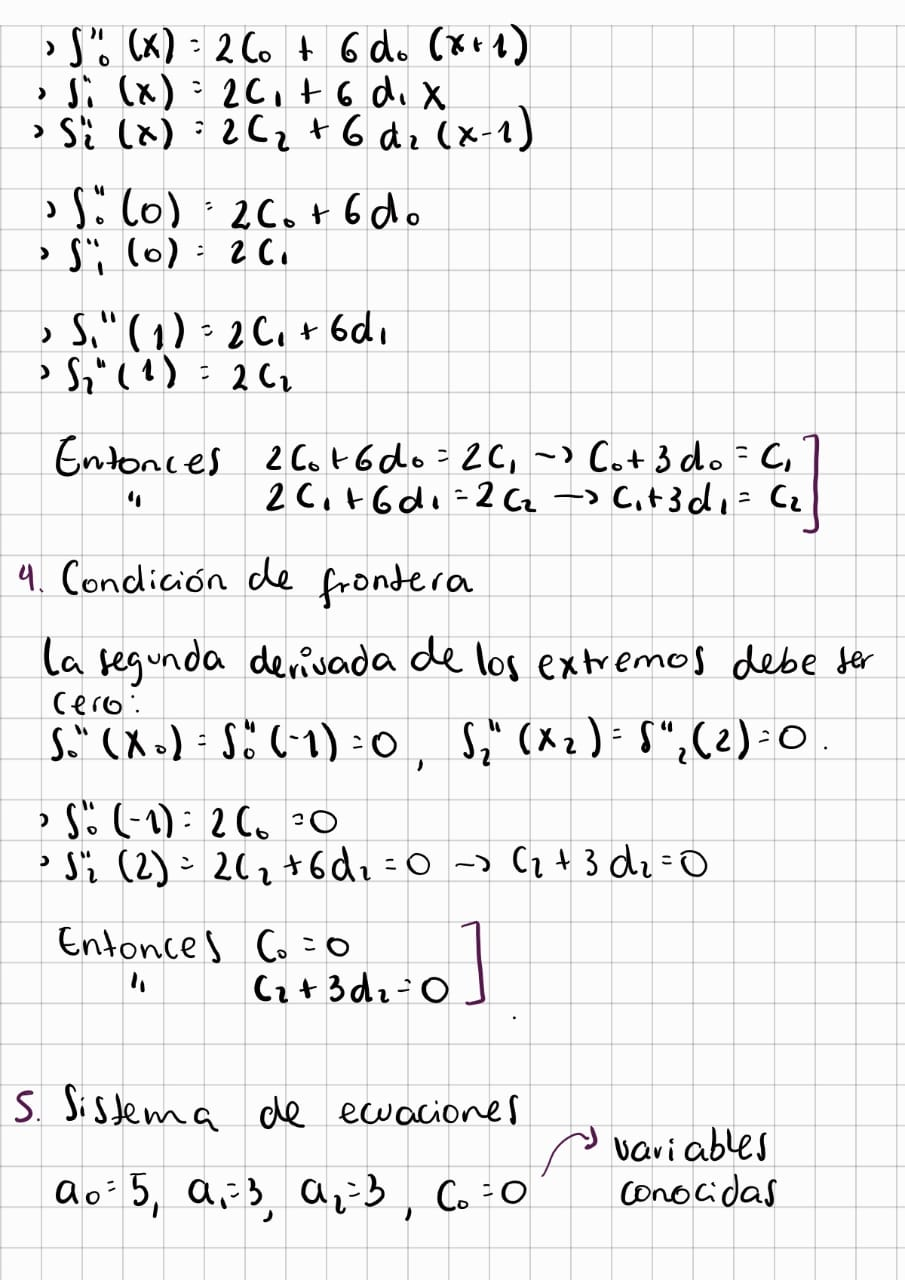

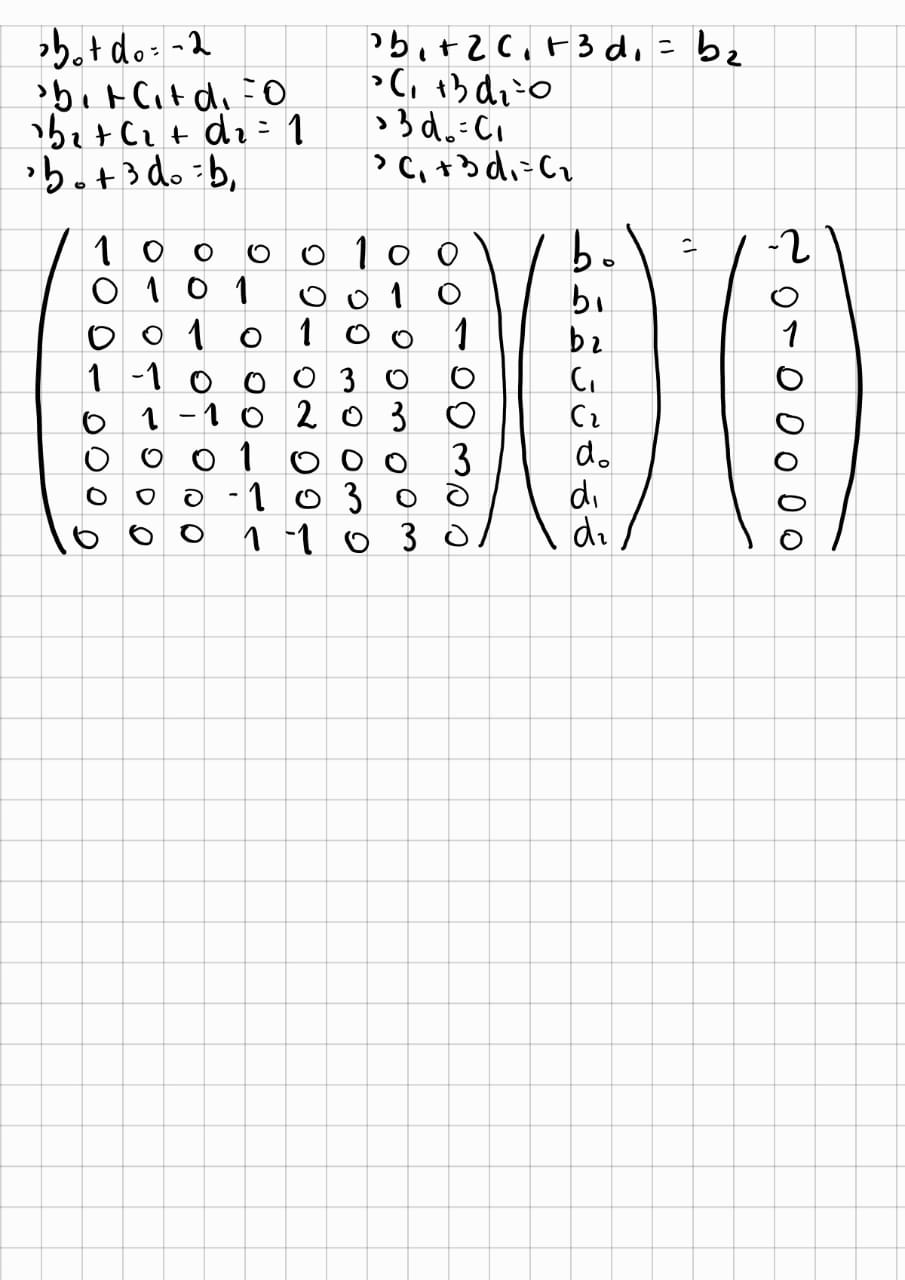